In [1]:
import numpy as np
import cv2 as cv
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [18]:
img = cv.imread('test/fed.jpg')
img.shape

(500, 500, 3)

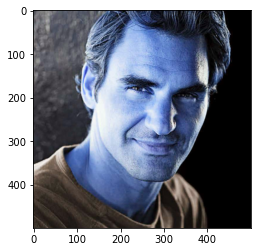

In [19]:
plt.imshow(img)

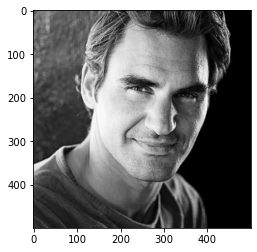

In [20]:
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

In [22]:
face_cascade=cv.CascadeClassifier('./haar_face.xml')
eye_cascade=cv.CascadeClassifier('./haar_eye.xml')
faces=face_cascade.detectMultiScale(gray,1.1,2)
faces

array([[145,  68, 306, 306]])

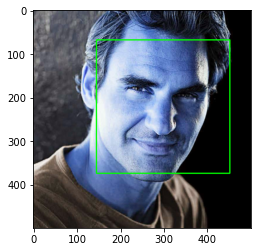

In [23]:
(x,y,w,h)=faces[0]
face_img=cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(face_img)

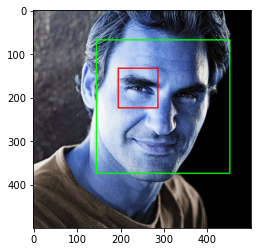

In [25]:
cv.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img=cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_clr=face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv.rectangle(roi_clr,(ex,ey),(ex+ew,ey+eh),(255,0,0),2)
# print(faces)
# eyes
plt.figure()
plt.imshow(face_img,cmap="gray")
plt.show()

In [35]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv.imread(image_path)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 2)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 1:
            return roi_color

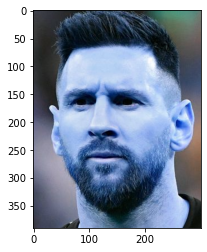

In [36]:
original_image = cv.imread('./test/messi-2.jpg')
plt.imshow(original_image)

(227, 227, 3)

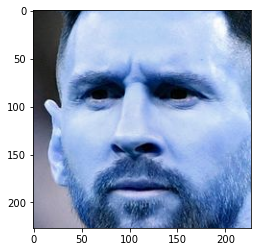

In [38]:
cropped=get_cropped_image_if_2_eyes('./test/messi-2.jpg')
plt.imshow(cropped)
cropped.shape

In [45]:
path_to_data='./dataset/'
path_to_cr_data='./dataset/cropped/'

In [46]:
import os

In [47]:
img_dirs=[]
for i in os.scandir(path_to_data):
    if i.is_dir():
        img_dirs.append(i.path)
img_dirs

['./dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federar',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [49]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data) #delete directory if exits already
os.mkdir(path_to_cr_data) #make new directory for cropped images

In [56]:
cropped_img_dirs=[]
celebrity_file_names_dict={}

for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split('/')[-1]
    
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_image_if_2_eyes(entry.path) #image path
        if roi_color is not None:
            cropped_folder=path_to_cr_data+celebrity_name
            if not os.path.exists(cropped_folder):
                os.mkdir(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print('Generating images in cropped folder',cropped_folder)
            
            cropped_file_name=celebrity_name+str(count)+".png"
            cropped_file_path=cropped_folder+"/"+cropped_file_name
            
            cv.imwrite(cropped_file_path,roi_color) #saves image to the file path
            if celebrity_name not in celebrity_file_names_dict:
                celebrity_file_names_dict[celebrity_name]=[]
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            
            count+=1
        
    

Generating images in cropped folder ./dataset/cropped/lionel_messi
Generating images in cropped folder ./dataset/cropped/maria_sharapova
Generating images in cropped folder ./dataset/cropped/roger_federar
Generating images in cropped folder ./dataset/cropped/serena_williams
Generating images in cropped folder ./dataset/cropped/virat_kohli
